In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def brownian(n):
    '''
    return the brownian motion divided the [0, 1] interval into n pieces.
    '''
    B = np.random.normal(loc=0., scale=1/np.sqrt(n), size=n)
    return B.cumsum()

<IPython.core.display.Javascript object>


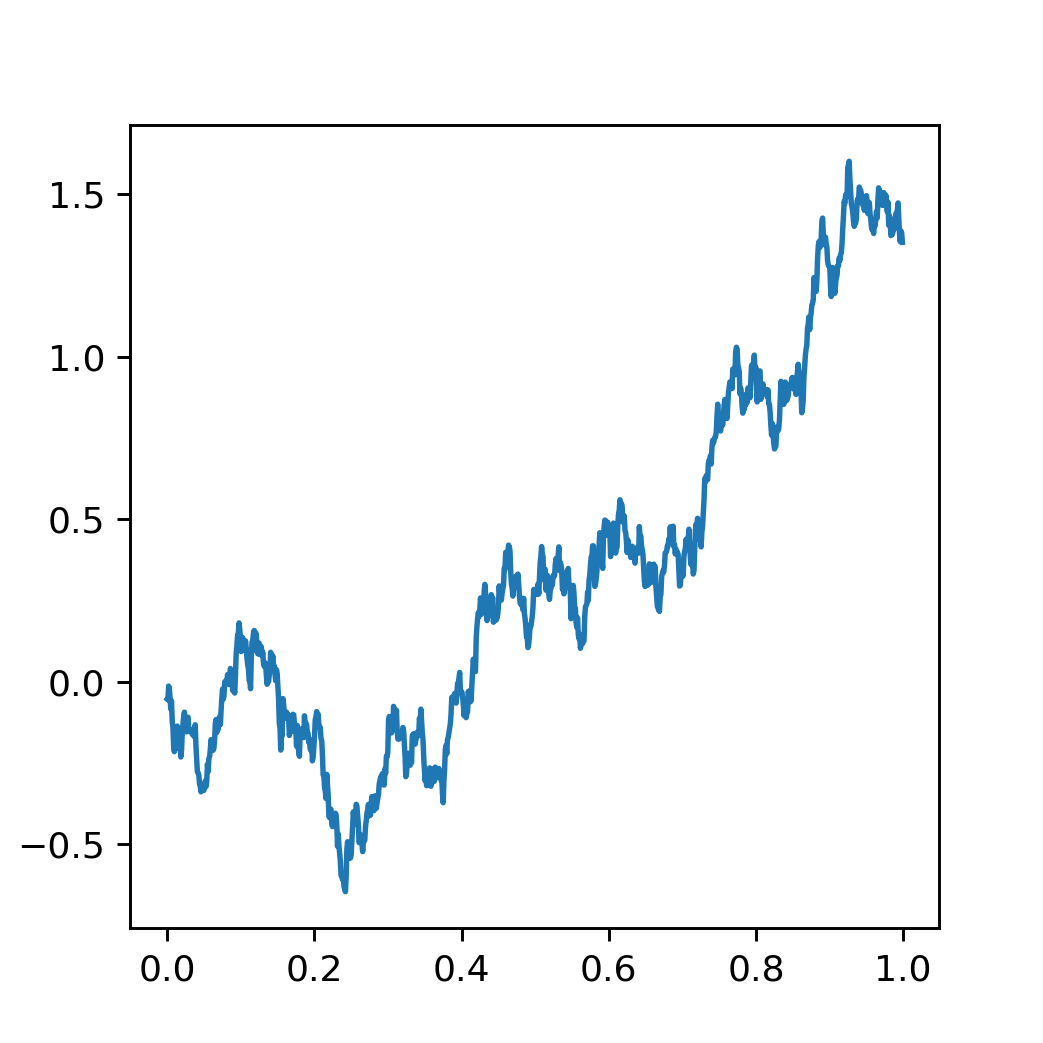

In [6]:
plt.figure(figsize=(4,4))
plt.plot([i/1024 for i in range(1024)], brownian(1024))
plt.savefig("brownian_motion")

In [3]:
brownian(5)

array([0.15856026, 0.64349676, 1.16739904, 1.16690333, 0.34382414])

In [4]:
def nb_sign_change(n):
    '''
    return the array of the sign change (which means that there's a zero in the interval)
    '''
    B = brownian(n)
    Bsign = np.sign(B)
    signchanges = (Bsign[1:] - Bsign[:-1] != 0).astype(int)
    return B, signchanges

In [5]:
def plt_Minkowski(M, label=True, nmax= -1):
    if nmax == -1:
        nmax = M // 100
    B, signchanges = nb_sign_change(M)
    epsilons = np.arange(1, nmax)
    Ns = []
    for epsilon in epsilons:
        N = 0 # Count the number of the ball used with radius epsilon
        last = True
        index = 0
        while index < M-1:
            if signchanges[index] and last == True:
                last = False
                N += 1
                index += epsilon
            elif signchanges[index]:
                N += 1
                index += epsilon
            else:
                index+= 1
        Ns.append(N)
    Ns = np.array(Ns)
    if label:
        label_title = "M={}".format(M)
    if Ns[0] == 0: # zero no found!
        return np.zeros(M // 100 - 1)
    Minkowski_dimension = np.log(Ns) / np.log(M/epsilons)
    plt.plot(epsilons / M, Minkowski_dimension, label="M={}".format(M))
    return Minkowski_dimension

<IPython.core.display.Javascript object>


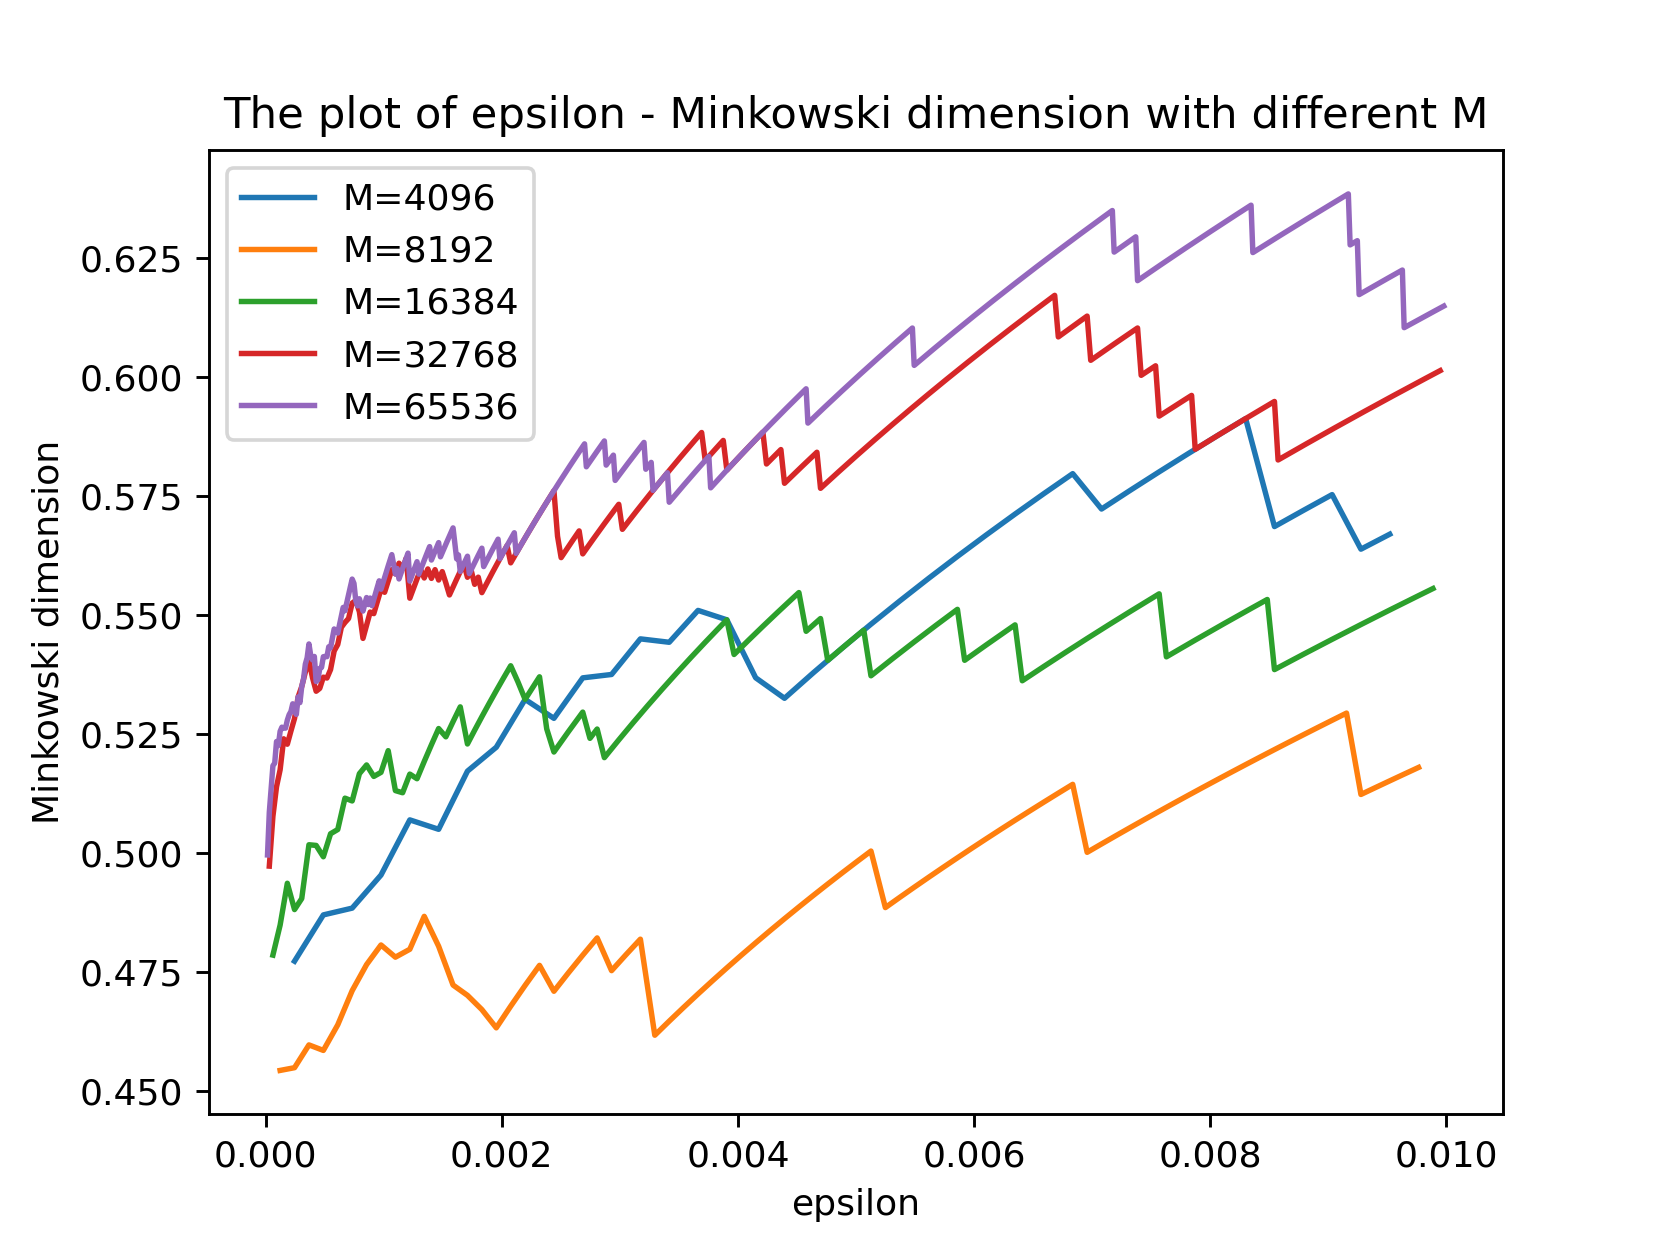

In [6]:
plt.figure()
plt_Minkowski(2**12)
plt_Minkowski(2**13)
plt_Minkowski(2**14)
plt_Minkowski(2**15)
plt_Minkowski(2**16)
plt.legend(loc="best")
plt.xlabel("epsilon")
plt.ylabel("Minkowski dimension")
plt.title("The plot of epsilon - Minkowski dimension with different M")
plt.savefig("differentM.png")

<IPython.core.display.Javascript object>


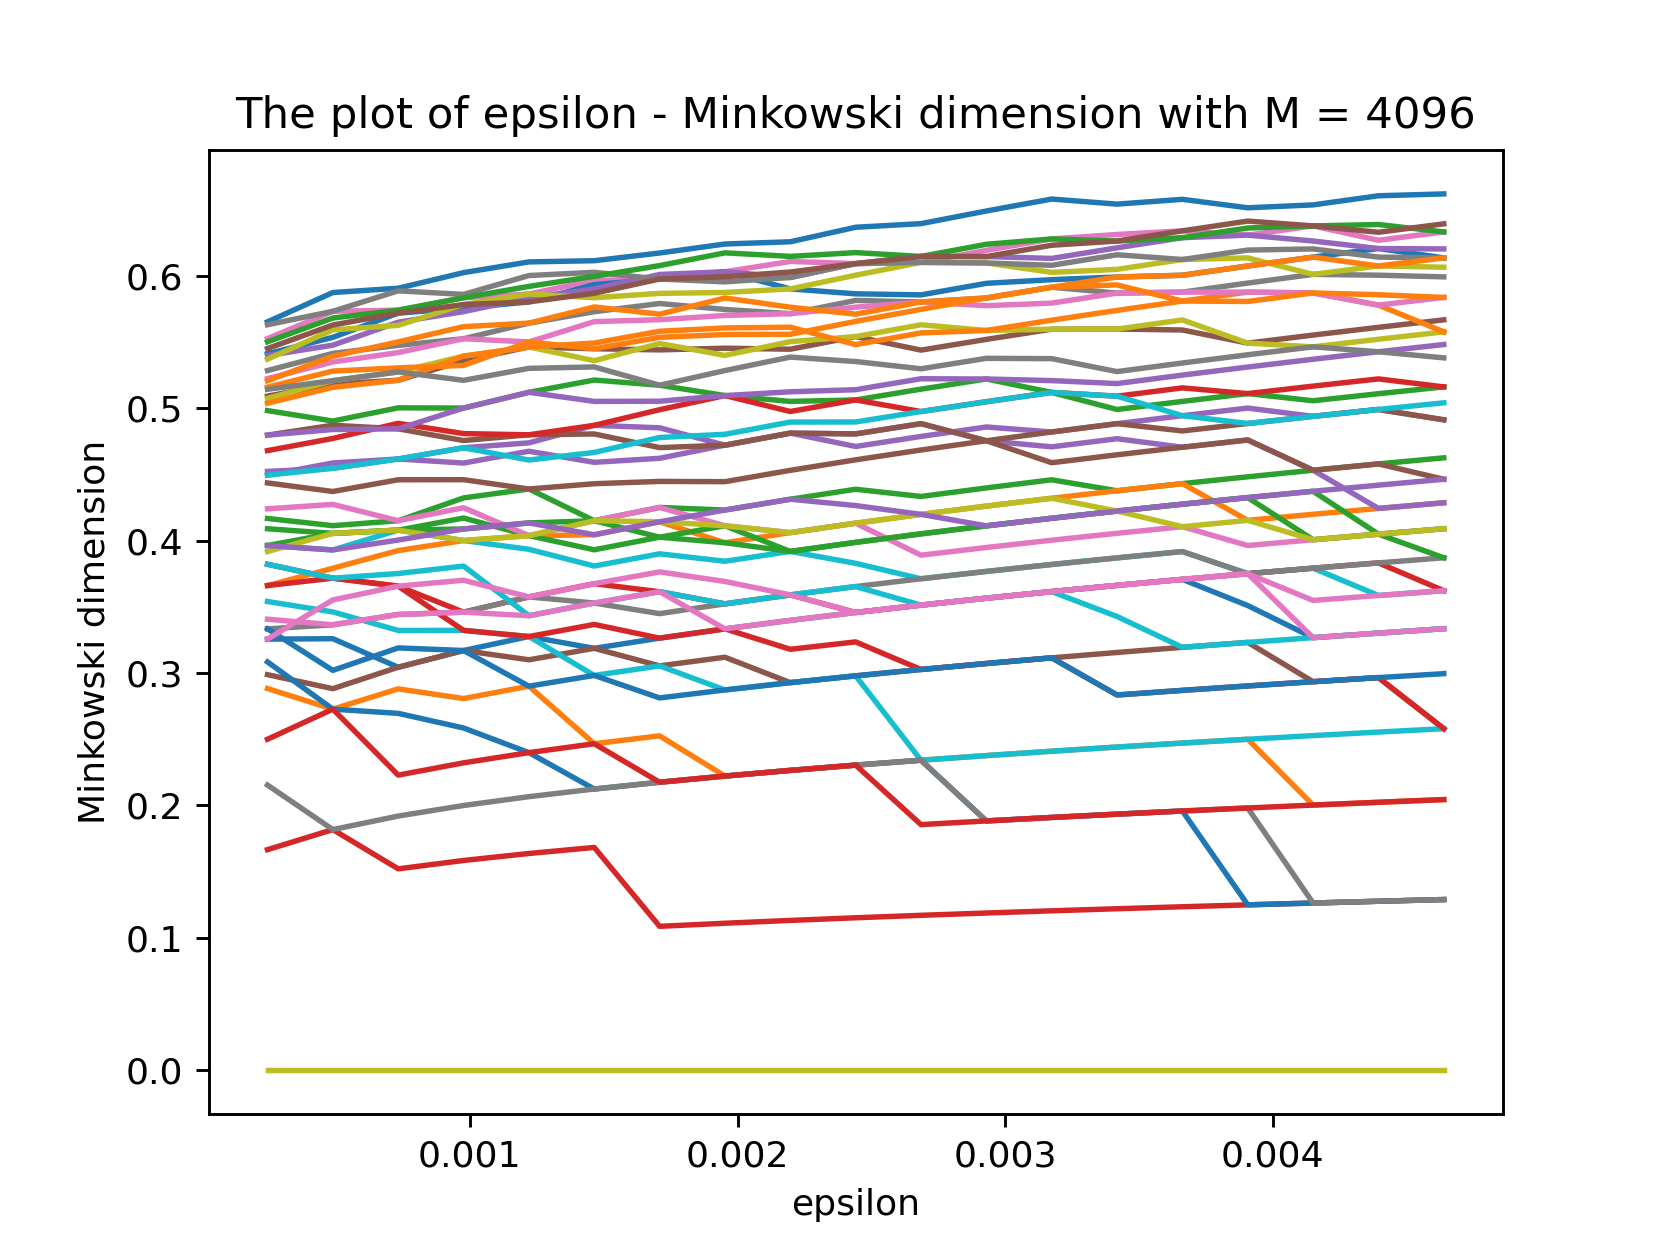

CPU times: user 3.02 s, sys: 20.5 ms, total: 3.04 s
Wall time: 3.03 s


In [6]:
%%time
plt.figure()
distribution = []
for i in range(50):
    Minkowski_dimension = plt_Minkowski(2**12, nmax=20)
    if Minkowski_dimension[0] != 0:
        distribution.append(Minkowski_dimension)
plt.xlabel("epsilon")
plt.ylabel("Minkowski dimension")
plt.title("The plot of epsilon - Minkowski dimension with M = 4096")
plt.savefig("sameM.png")

<IPython.core.display.Javascript object>


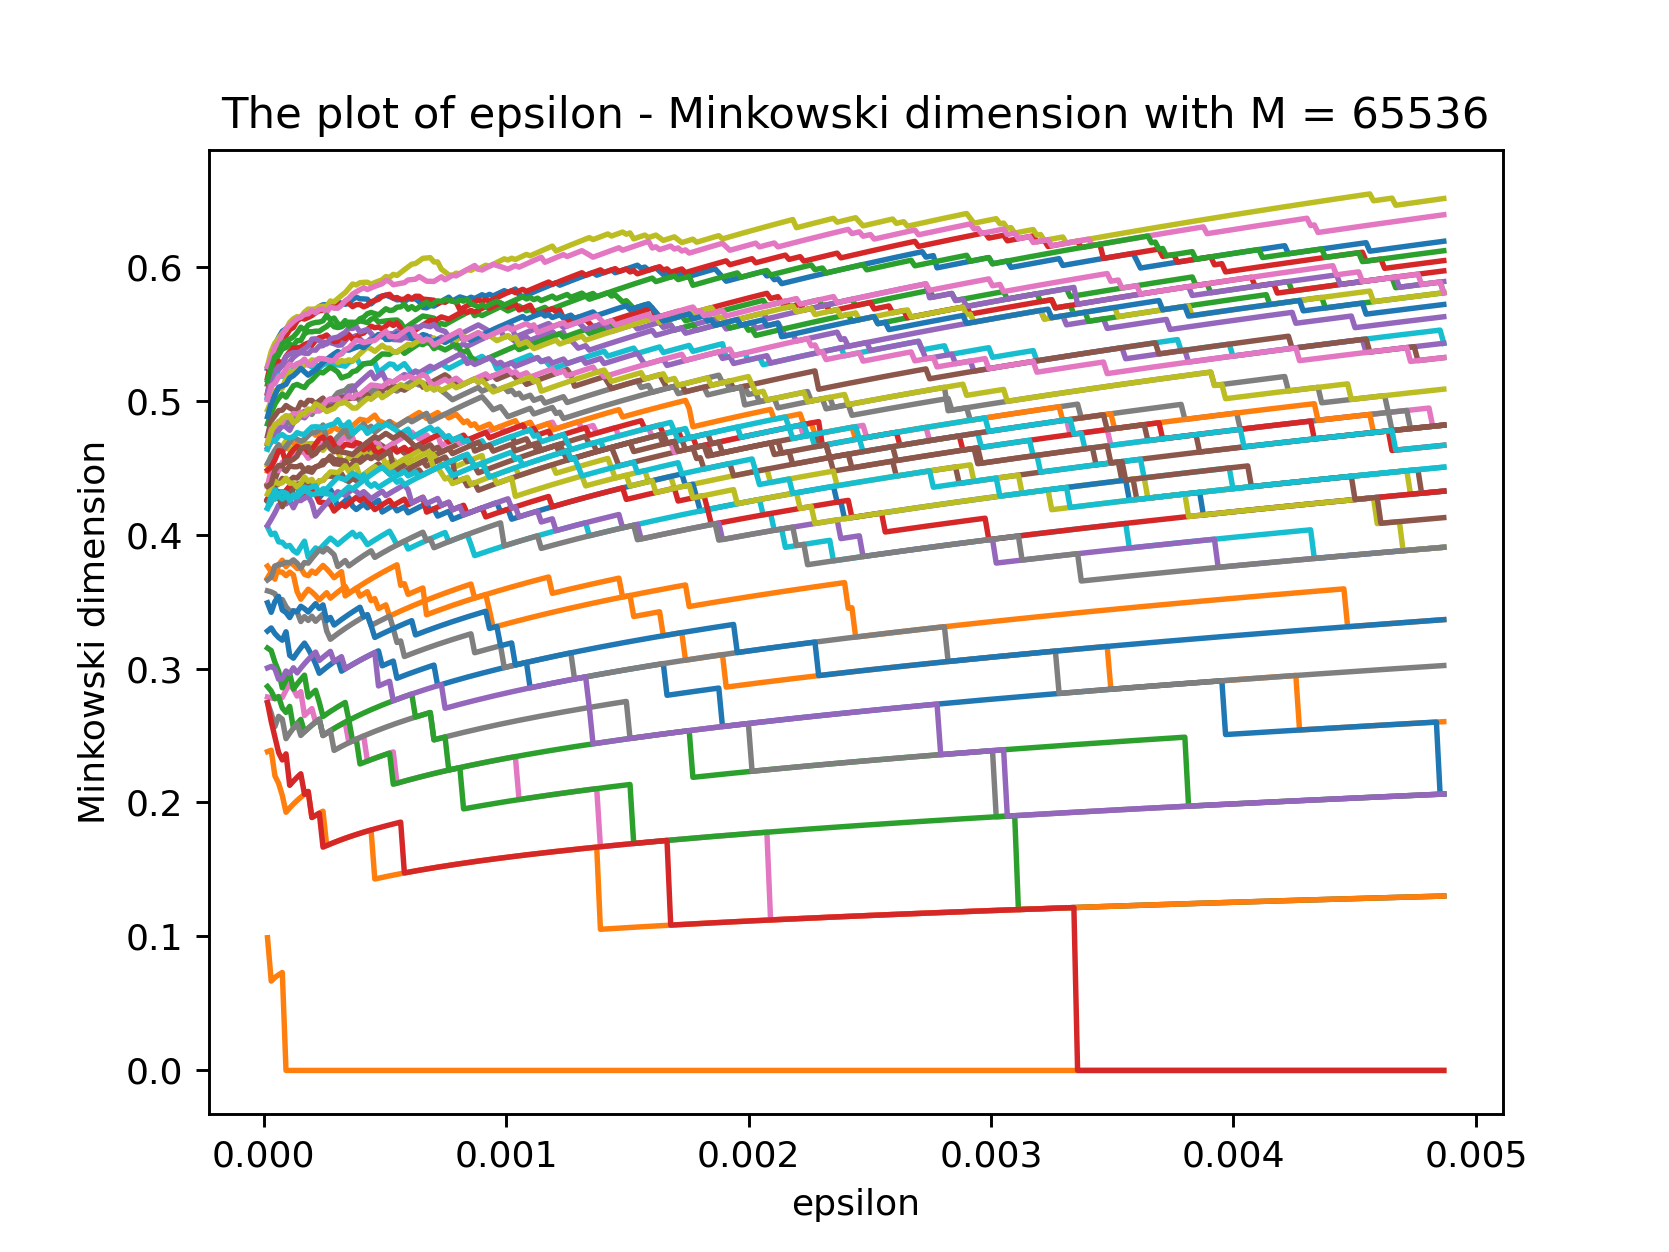

CPU times: user 13min 15s, sys: 60 ms, total: 13min 15s
Wall time: 13min 15s


In [7]:
%%time
plt.figure()
distribution = []
for i in range(50):
    Minkowski_dimension = plt_Minkowski(2**16, nmax=320)
    if Minkowski_dimension[0] != 0:
        distribution.append(Minkowski_dimension)
plt.xlabel("epsilon")
plt.ylabel("Minkowski dimension")
plt.title("The plot of epsilon - Minkowski dimension with M = {}".format(2**16))
plt.savefig("samebigM.png")

<IPython.core.display.Javascript object>


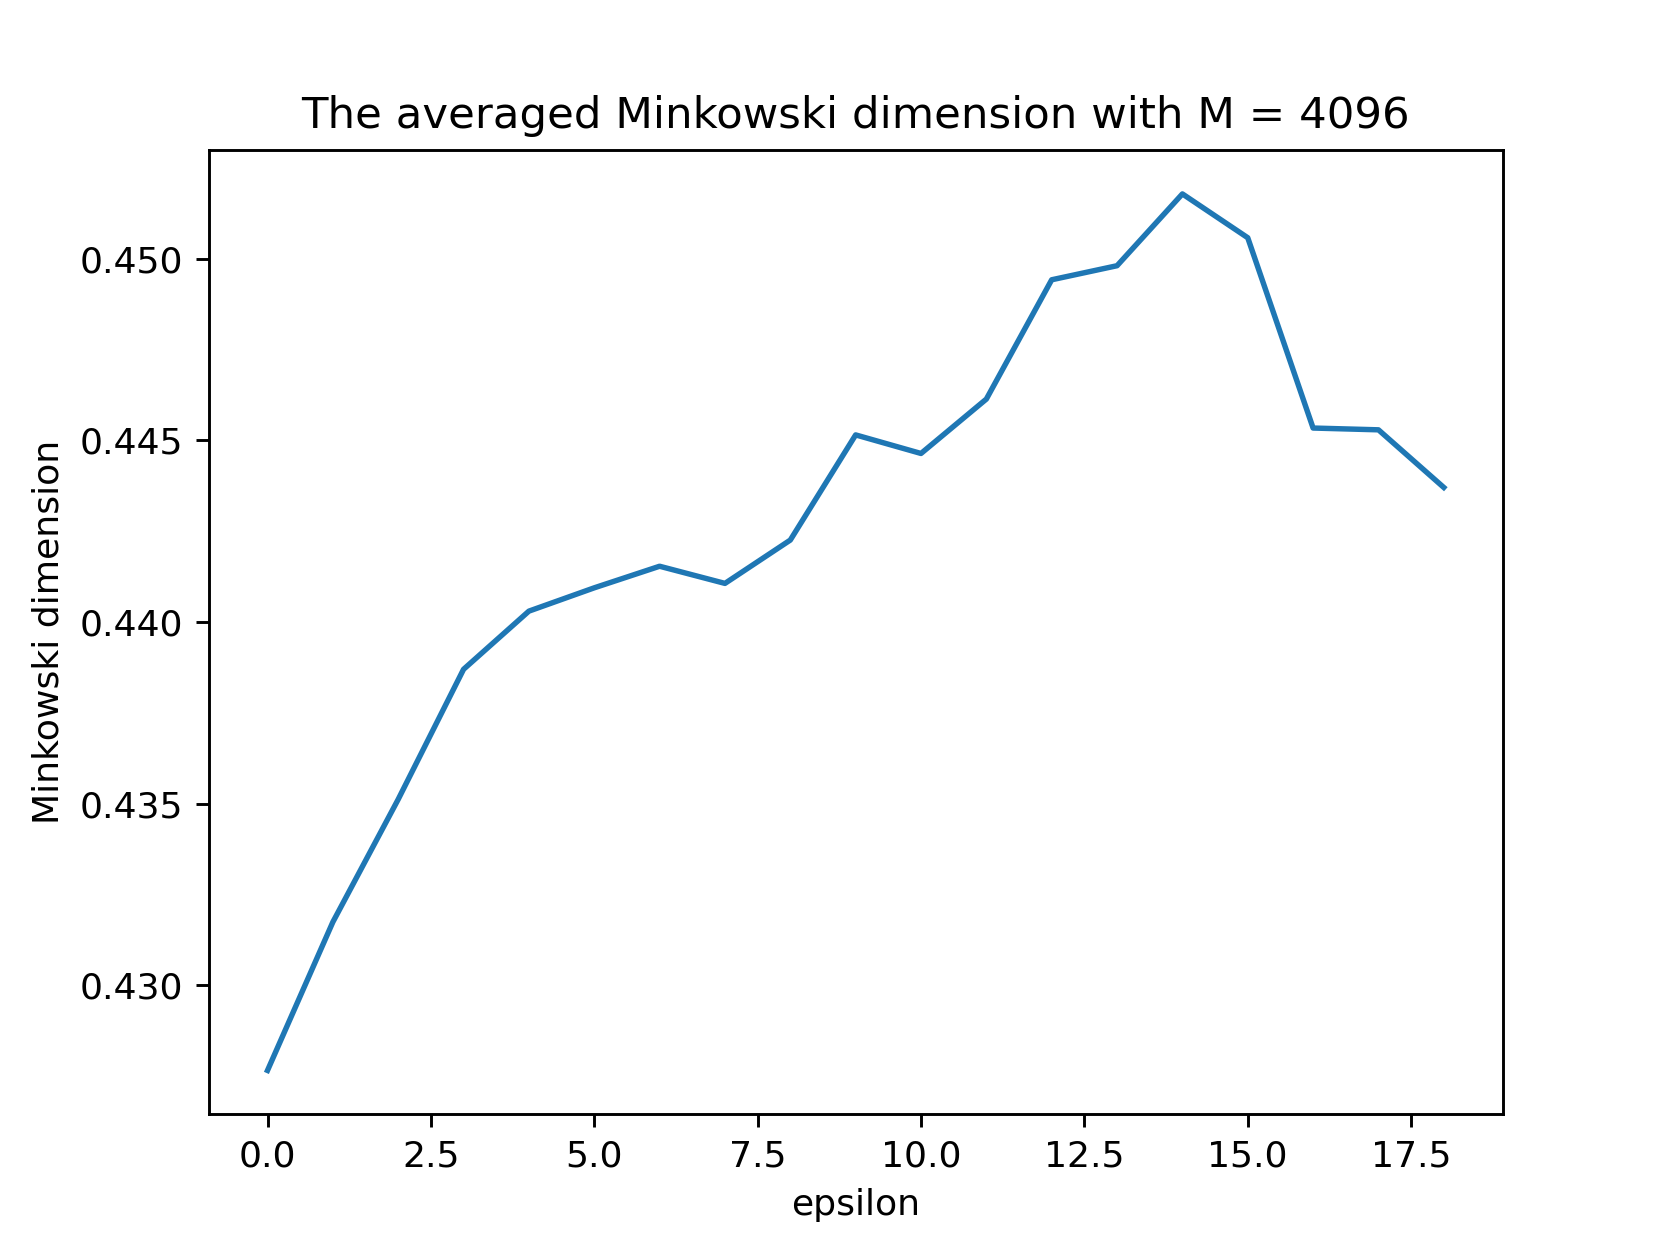

In [8]:
plt.figure()
distribution = np.array(distribution)
plt.plot(distribution.mean(axis=0))
plt.xlabel("epsilon")
plt.ylabel("Minkowski dimension")
plt.title("The averaged Minkowski dimension with M = 4096")
plt.savefig("mean.png")

<IPython.core.display.Javascript object>


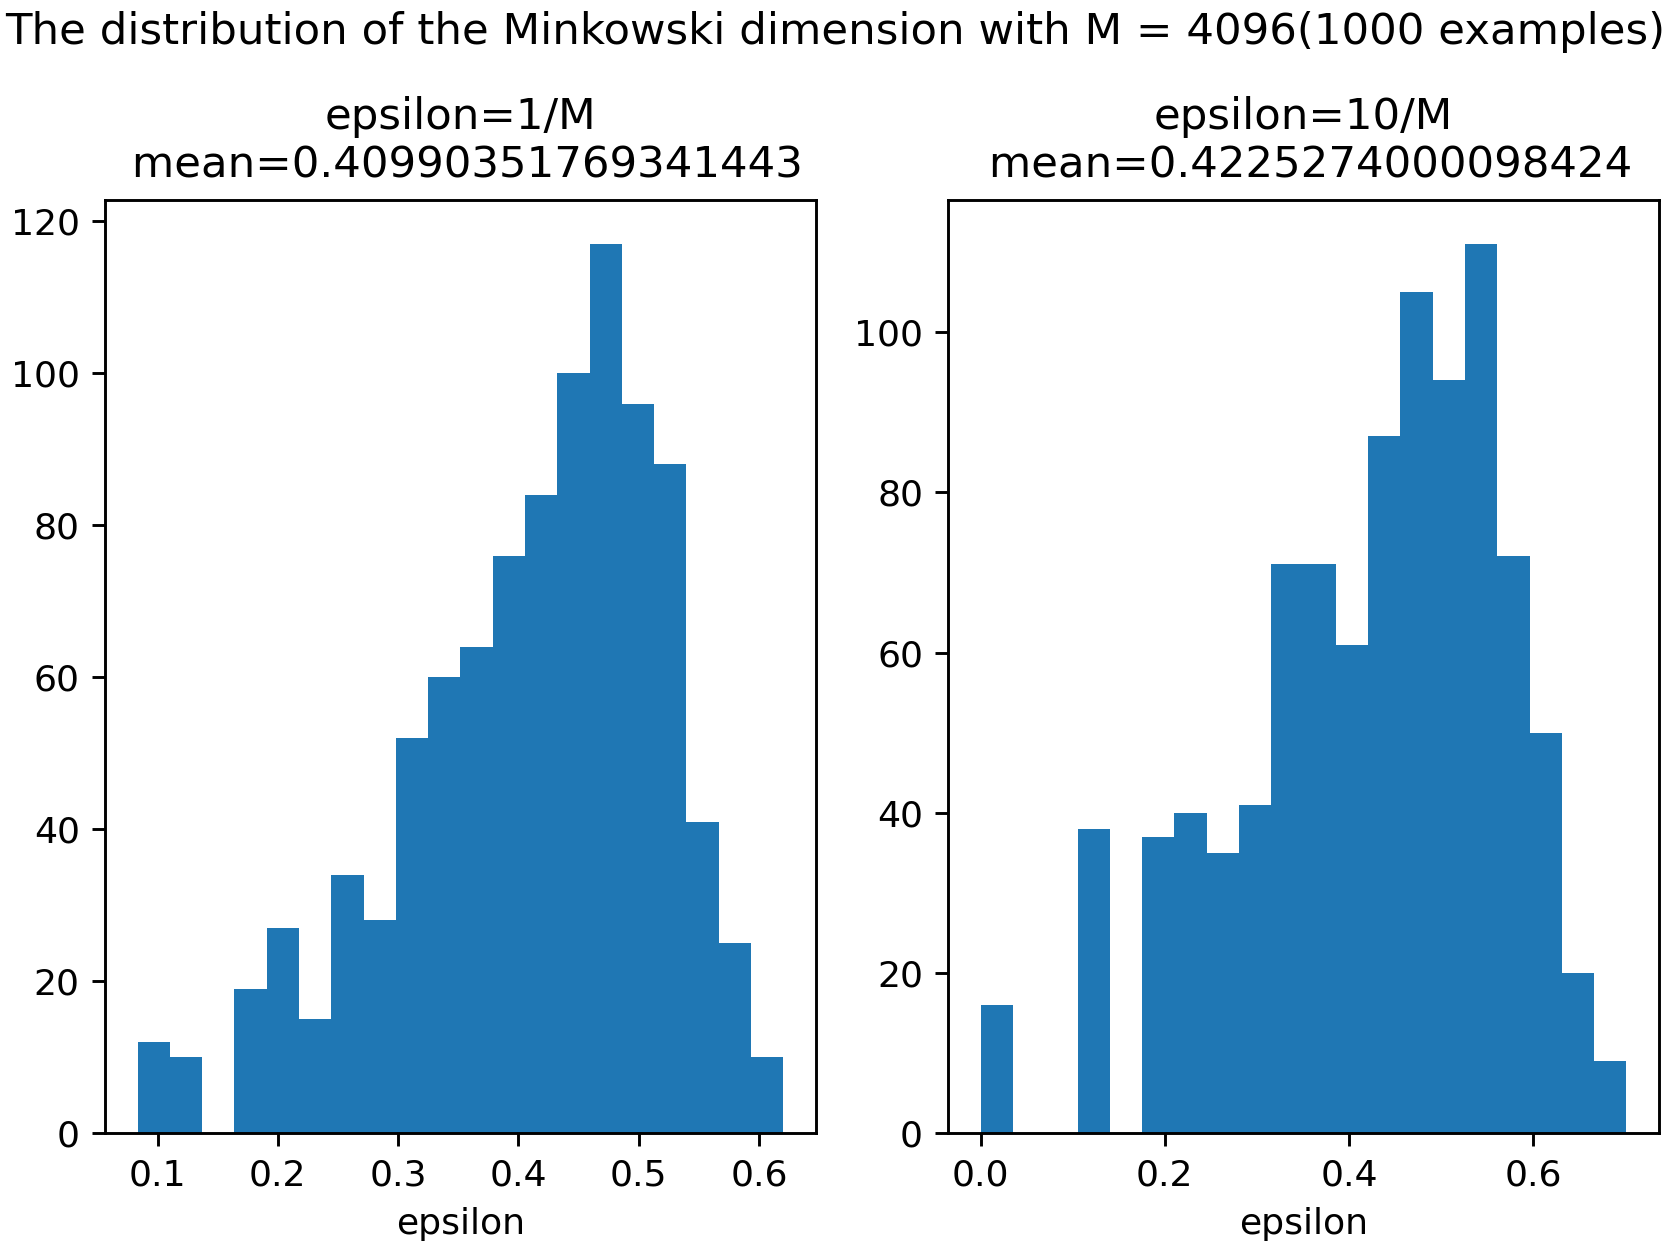

In [18]:
distribution = []
for i in range(1000):
    Minkowski_dimension = plt_Minkowski(2**12, nmax=20)
    if Minkowski_dimension[0] != 0:
        distribution.append(Minkowski_dimension)
distribution = np.array(distribution)
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
axs[0].hist(distribution[:, 0], bins=20)
axs[0].set_xlabel("epsilon")
axs[0].set_title("epsilon=1/M\n mean={}".format(distribution[:, 0].mean()))

axs[1].hist(distribution[:, 9], bins=20)
axs[1].set_xlabel("epsilon")
axs[1].set_title("epsilon=10/M\n mean={}".format(distribution[:, 9].mean()))

fig.suptitle("The distribution of the Minkowski dimension with M = 4096(1000 examples)")
fig.savefig("dist.png")

In [29]:
def Minkowski_dim(M=2**20):
    B, signchanges = nb_sign_change(M)
    dimensions = []
    epsilon = 10
    for i in range(10):
        step = 2 ** i
        N = 0 # Count the number of the ball used with radius epsilon
        last = True
        index = 0
        while index < M-1:
            if signchanges[index] and last == True:
                last = False
                N += 1
                index += epsilon
            elif signchanges[index]:
                N += 1
                index += epsilon
            else:
                index+= step
        Minkowski_dimension = np.log(N) / np.log(M/epsilon)
        dimensions.append(Minkowski_dimension)
    return np.array(dimensions)

In [30]:
%%time
values = []
for i in range(50):
    values.append(Minkowski_dim())
values = np.array(values)

<ipython-input-29-288b9d2ef84a>:20: RuntimeWarning: divide by zero encountered in log
  Minkowski_dimension = np.log(N) / np.log(M/epsilon)


CPU times: user 37.2 s, sys: 89.2 ms, total: 37.3 s
Wall time: 37.3 s


<IPython.core.display.Javascript object>


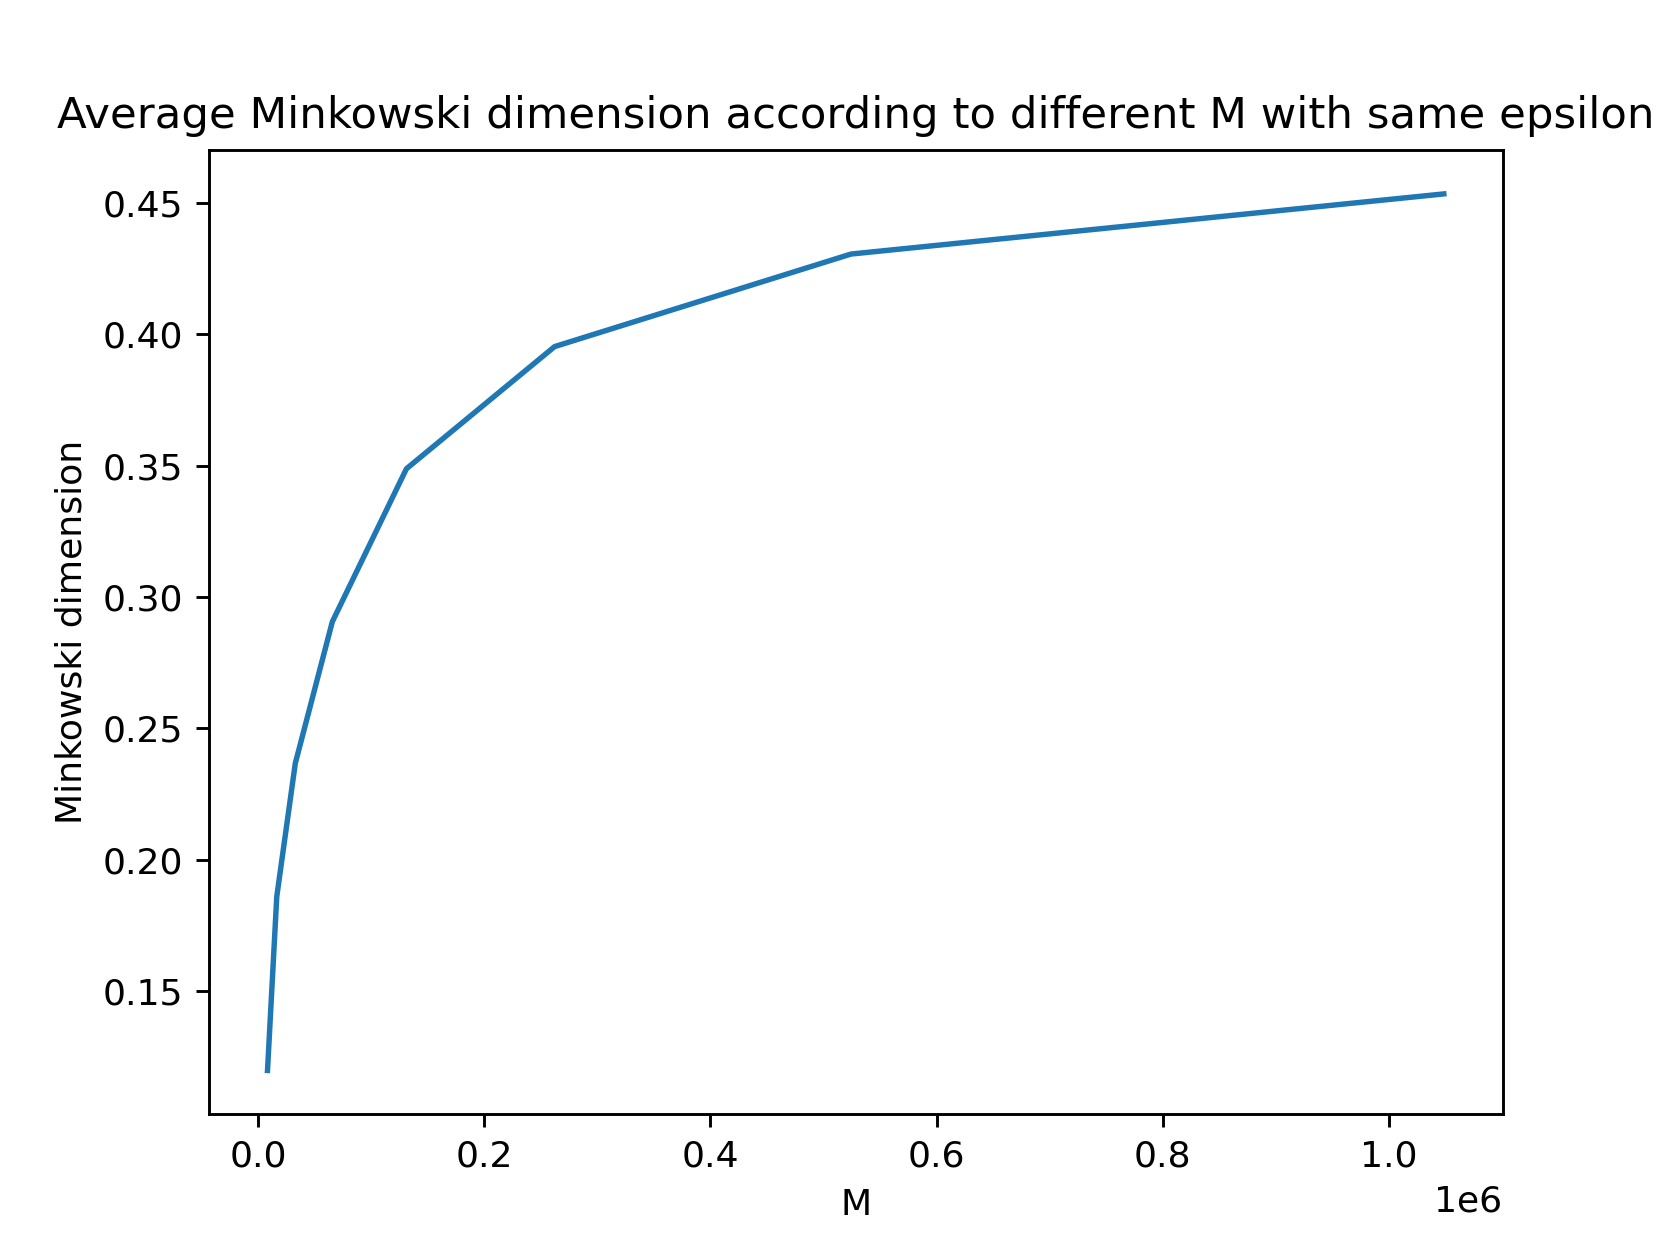

In [31]:
plt.figure()
plt.plot([2 ** (i+11) for i in range(9, -1, -1)], values.mean(axis=0), label="Average of Minkowski dimension")
plt.xlabel("M")
plt.ylabel("Minkowski dimension")
plt.title("Average Minkowski dimension according to different M with same epsilon")
plt.savefig("differentM_2.png")